# Nacitanie kniznic

In [3]:
!pip install matplotlib cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 2.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 3.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 3.1 MB/s eta 0:00:0000:0100:01m


In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import math
import json

from datetime import datetime

In [4]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [1]:
import pandas as pd

# Vysielace, prijimac a zemetrasenia

In [6]:
# Polohy vysielacov a prijimaca
RECEIVER = {"latitude": 44.85540, "longitude": 20.39108}
TRANSMITTERS = [
    {"latitude": 40.922889, "longitude": 9.732052, "frequency": 20.27, "name": "ICV"},
    {"latitude": 66.982337, "longitude": 13.872471, "frequency": 16.4, "name": "JXN"},
    {"latitude": 53.087341, "longitude": 7.608652, "frequency": 23.4, "name": "DHO"},
    {"latitude": 54.731929, "longitude": 2.883359, "frequency": 22.1, "name": "GVT"},
]

NUMBER_OF_BINS = 9
ATTENUATION = 0.8
ATTENUATION_DISTANCE = 250 # km

In [74]:
# nacitanie zemetraseni
eq_df = pd.read_csv("earthquakes.csv", index_col=0)
print(len(eq_df))
eq_df.head(1)

3172


,date,time,latitude,longitude,region name,depth,magnitude type,magnitude,eqid,hour,minute,second,datetime
3000,2016-11-16,23:26:22,35.05,23.15,"CRETE, GREECE",16,ML,2.4,550922,23,26,22.0,2016-11-16 23:26:22


In [92]:
# vypis, kolko zemetraseni v ktorom regione sa vyskytlo
eq_df["region name"].value_counts()

CENTRAL ITALY                       1457
WESTERN TURKEY                       447
GREECE                               411
SOUTHERN GREECE                       86
CRETE, GREECE                         82
DODECANESE ISLANDS, GREECE            74
DODECANESE IS.-TURKEY BORDER REG      66
NEAR THE COAST OF WESTERN TURKEY      64
AEGEAN SEA                            49
SWITZERLAND                           41
FRANCE                                36
ALBANIA                               30
ROMANIA                               25
GERMANY                               25
IONIAN SEA                            24
CENTRAL MEDITERRANEAN SEA             20
EASTERN MEDITERRANEAN SEA             17
SVALBARD REGION                       16
SICILY, ITALY                         15
NORTHERN ITALY                        15
NORTHERN ALGERIA                      12
POLAND                                12
PYRENEES                              12
SOUTHERN ITALY                        12
STRAIT OF GIBRAL

In [76]:
len(eq_df.loc[eq_df["magnitude"] > 2])

2865

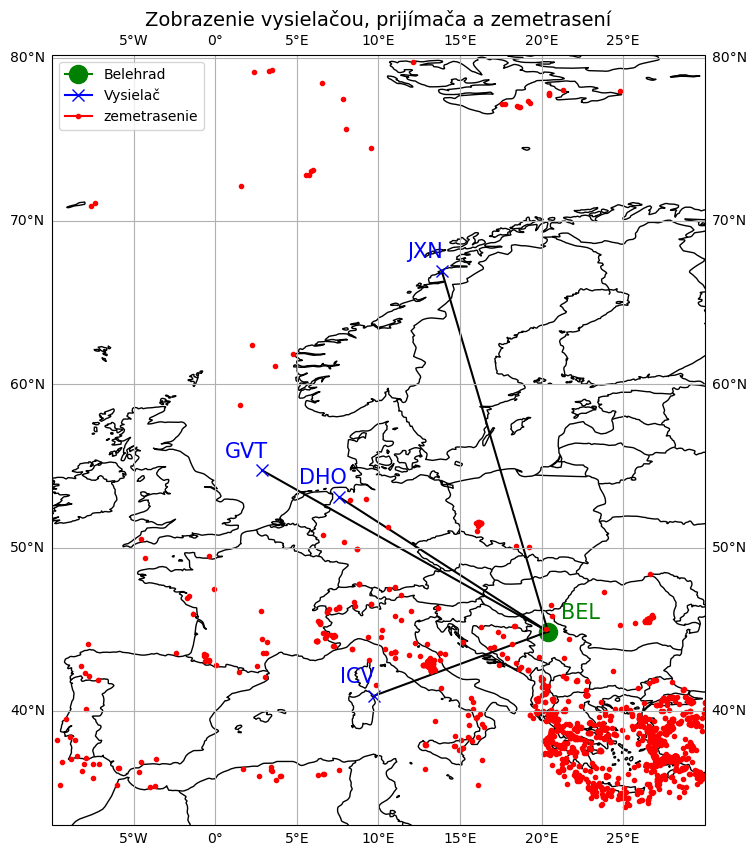

In [78]:
# zobrazenie zemetraseni, vysielacov a prijimaca a vzdialenost medzi nimi

fig, ax = plt.subplots(figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-10, 30, 33, 80])  # Stredná Európa

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle='solid')

# vykreslenie prijimaca
ax.plot(RECEIVER.get("longitude"), RECEIVER.get("latitude"), marker='o', color='green', markersize=13, label='Belehrad')
ax.text(RECEIVER.get("longitude") + 2, RECEIVER.get("latitude") + 0.8, "BEL", color='green', fontsize=15, ha='center')

# vykreslenie vysielacov
for trans in TRANSMITTERS:
    lat = trans.get("latitude")
    lon = trans.get("longitude")
    name = trans.get("name")
    ax.plot([RECEIVER.get("longitude"), lon],
            [RECEIVER.get("latitude"), lat],
            color="black",
            linewidth=1.5,
           )
    ax.text(lon - 1, lat + 0.8, name, color='blue', fontsize=15, ha='center')

    ax.plot(lon, lat, marker='x', color='blue', markersize=8, label=name)

# vykreslenie zemetraseni s magnitudou > 2
for _, eq in eq_df.iterrows():
    if eq.get("magnitude") > 2:
        ax.plot(eq.get("longitude"), eq.get("latitude"), marker='o', color='red', markersize=3, label="zemetrasenie")

lines, line_names = ax.get_legend_handles_labels()
ax.legend(loc="upper left", handles=lines[:2] + lines[10:11], labels=["Belehrad", "Vysielač", "zemetrasenie"])
ax.gridlines(draw_labels=True)

# Zobrazenie mapy
plt.show()

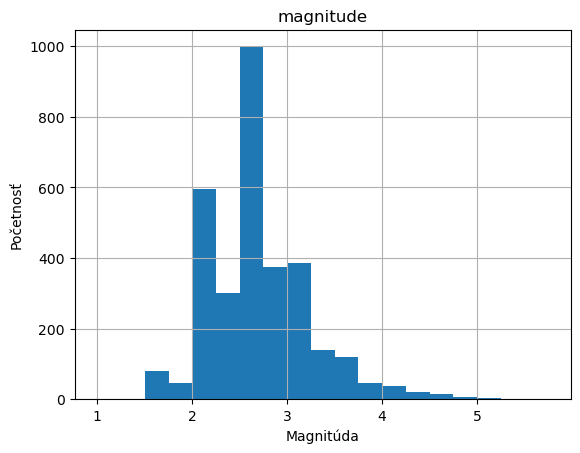

In [86]:
# distribucia hodnot atributu magnituda

axarr = eq_df.hist(column=["magnitude"], bins=[i for i in np.arange(1, 6, 0.25)])

for ax in axarr.flatten():
    ax.set_xlabel("Magnitúda")
    ax.set_ylabel("Početnosť")

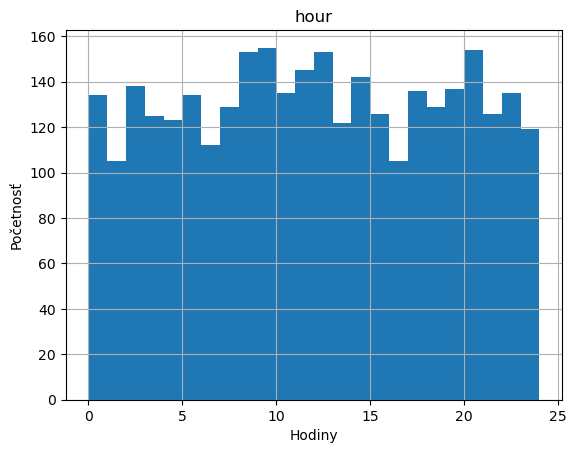

In [102]:
# pocetnost zemetraseni v jednotlivych hodinach

axarr = eq_df.hist(column=["hour"], bins=[i for i in np.arange(0, 25, 1)])

for ax in axarr.flatten():
    ax.set_xlabel("Hodiny")
    ax.set_ylabel("Početnosť")

# Amplituda

In [55]:
# Nacitanie amplitudy
amp_df = pd.read_csv("amplitudes/ICV/2016-10-08_ICV_data.csv", index_col=0)
print(len(amp_df))
amp_df.head(1)

863900


,hour,minute,second,amplitude,date,time,A_base,dA,dA_abs,A_noise,datetime
50,0,0,5.0,44.5132,2016-10-08,00:00:05,44.729979,-0.216779,0.216779,0.302205,2016-10-08 00:00:05


<Axes: title={'center': 'Vývoj amplitúdy signálu vysielača ICV za deň 8.10.2016'}, xlabel='Čas', ylabel='Amplitúda'>

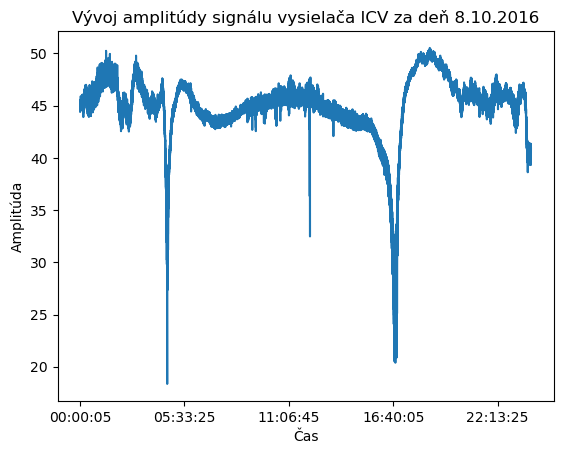

In [79]:
# vykreslenie amplitudy v ramci jedneho dna

amp_df.plot("time", "amplitude", xlabel="Čas", ylabel="Amplitúda", legend=False, title="Vývoj amplitúdy signálu vysielača ICV za deň 8.10.2016")

In [88]:
amp_df.describe()

,hour,minute,second,amplitude,A_base,dA,dA_abs,A_noise
count,863900.000000,863900.000000,863900.000000,863900.000000,863900.000000,863900.000000,8.639000e+05,863900.000000
mean,11.500000,29.500000,29.950000,45.013369,45.013373,-0.000004,1.474649e-01,0.373890
std,6.921485,17.316206,17.318962,2.932911,2.922759,0.237869,1.866430e-01,0.278100
min,0.000000,0.000000,0.000000,18.355500,24.544150,-11.782375,1.421085e-14,0.146284
25%,6.000000,15.000000,15.000000,44.087200,44.091304,-0.102694,4.818275e-02,0.243986
50%,11.500000,29.500000,29.950000,45.342700,45.351718,0.001044,1.043370e-01,0.319341
75%,17.000000,44.000000,44.900000,46.353600,46.318861,0.105949,1.887100e-01,0.408060
max,23.000000,59.000000,59.900000,50.526200,50.197142,3.887372,1.178237e+01,3.455099


# Nacitanie dat a vizualizacia

In [9]:
# nacitanie zemetraseni s najvacsim vplyvom na jednotlive body medzi vysielacom a prijimacom
eq_df = pd.read_csv("eq_biggest_influence.csv")
eq_df.drop(columns=[col for col in eq_df.columns if col.startswith("Unnamed")], inplace=True)
print(len(eq_df))
eq_df

7


,date,time,latitude,longitude,region name,depth,magnitude type,magnitude,eqid,hour,minute,second
0,2016-11-09,15:58:43,42.92,18.44,BOSNIA AND HERZEGOVINA,11,MB,4.4,544143,15,58,43.0
1,2016-11-04,10:10:33,50.80,6.61,GERMANY,15,ML,2.8,542857,10,10,33.0
2,2016-11-03,10:57:25,58.77,1.50,NORTH SEA,116,MB,4.2,542623,10,57,25.0
3,2016-10-30,06:40:18,42.84,13.11,CENTRAL ITALY,10,MW,6.5,540796,6,40,18.0
4,2016-10-17,23:50:32,51.55,16.18,POLAND,1,ML,4.3,537763,23,50,32.0
5,2016-10-14,16:08:48,49.92,8.70,GERMANY,6,ML,2.9,536987,16,8,48.0
6,2016-10-09,12:48:24,62.41,2.25,NORWEGIAN SEA,2,MB,4.7,536076,12,48,24.0


In [10]:
# Nacitanie amplitudy signalu
amp_df = pd.read_csv("amplitudes/izlaz20161030ICV.csv")
amp_df.drop(columns=[col for col in amp_df.columns if col.startswith("Unnamed")], inplace=True)
print(len(amp_df))
amp_df.head(1)

863899


,hour,minute,second,amplitude,A_base,dA,dA_abs,A_noise,date,time
0,0,0,5.1,54.5329,54.078528,0.454372,0.454372,1.139055,2016-10-30,00:00:05


<Axes: xlabel='time'>

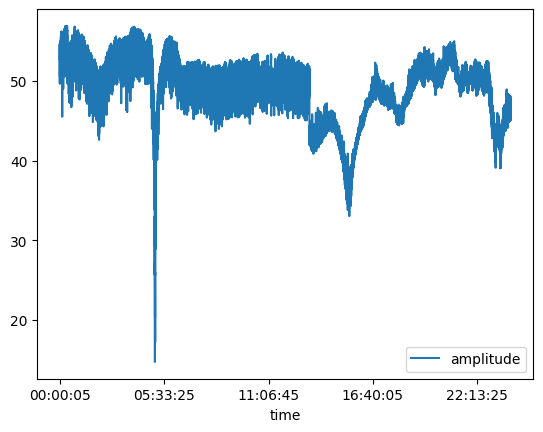

In [11]:
amp_df.plot("time", "amplitude")